In [160]:
import numpy as np

In [304]:
train_data = np.load('/poc-data/pvn/data/F3/train/train_seismic.npy')
train_data.shape

(401, 701, 255)

In [21]:
test_data1 = np.load('/poc-data/pvn/data/F3/test/test1_seismic.npy')
test_data1.shape

(200, 701, 255)

In [22]:
test_data2 = np.load('/poc-data/pvn/data/F3/test/test2_seismic.npy')
test_data2.shape

(601, 200, 255)

In [23]:
train_data = np.concatenate((test_data1, train_data), axis=0).transpose(2, 0, 1)
train_data.shape

(255, 601, 701)

In [24]:
test_data = test_data2.transpose(2,0,1)
test_data.shape

(255, 601, 200)

In [7]:
from matplotlib import pyplot as plt

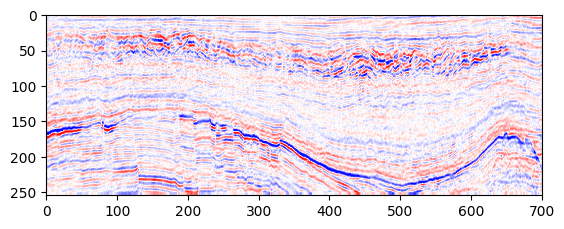

In [33]:
plt.imshow(train_data[:,0,:], cmap='bwr')

In [ ]:
MODEL_FLAGS="--attention_resolutions 32,16,8 --class_cond False --diffusion_steps 1000 --image_size 128 --learn_sigma True --noise_schedule cosine --num_channels 128 --num_heads 4 --num_res_blocks 2 --resblock_updown True --use_fp16 True --use_scale_shift_norm True"
CHECKPOINT_FLAGS="--resume_checkpoint results/ckpt/model001000.pt"
!python3 scripts/train.py $MODEL_FLAGS --batch_size 64 --save_interval 25000 --data_dir '/poc-data/pvn/data/F3'

Logging to ./results
creating model and diffusion...
creating data loader...
Training on F3 dataset
Number data: 62096
training...
----------------------------
| grad_norm     | 9.67     |
| lg_loss_scale | 20       |
| loss          | 12.5     |
| loss_q0       | 1.02     |
| loss_q1       | 1        |
| loss_q2       | 1.01     |
| loss_q3       | 41.7     |
| mse           | 1        |
| mse_q0        | 0.999    |
| mse_q1        | 0.999    |
| mse_q2        | 1        |
| mse_q3        | 1        |
| param_norm    | 222      |
| samples       | 64       |
| step          | 0        |
| vb            | 11.5     |
| vb_q0         | 0.0172   |
| vb_q1         | 0.00522  |
| vb_q2         | 0.00535  |
| vb_q3         | 40.7     |
----------------------------
saving model 0...
saving model 0.9999...
----------------------------
| grad_norm     | 9.44     |
| lg_loss_scale | 20       |
| loss          | 2.9      |
| loss_q0       | 0.874    |
| loss_q1       | 0.814    |
| loss_q2       

In [161]:
kerry_3d = np.load('/poc-data/pvn/data/Kerry3D/Kerry3D.npy')

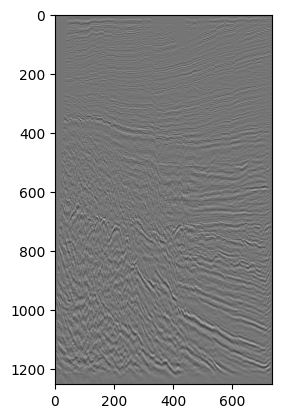

In [193]:
# plt.figure(figsize=(32,32))
plt.imshow(kerry_3d[15].transpose(), cmap='gray')

In [233]:
np.load('/poc-data/pvn/data/F3/train.npy').shape

(401, 701, 255)

In [162]:
kerry_3d.shape

(287, 735, 1252)

In [187]:
np.ceil((901/128))

8.0

In [180]:
5*25*735 + 14*25*287

192325

In [188]:
6*10*287+3*10*735+2*5*901+2*8*601

57896

In [280]:
kery_3d = np.load('/poc-data/pvn/data/Kerry3D/Kerry3D.npy')

In [281]:
train = kery_3d[:, 0:440, :]
val = kery_3d[:143, 440:, :]
test = kery_3d[143:, 440:, :]

In [287]:
np.save('/poc-data/pvn/data/Kerry3D/train.npy', train)
np.save('/poc-data/pvn/data/Kerry3D/validation.npy', val)
np.save('/poc-data/pvn/data/Kerry3D/test.npy', test)

In [414]:
train.shape

(287, 440, 1252)

In [415]:
normalize(train.transpose(2,0,1)).min()

-1.0

In [418]:
np.array(split_patch(normalize(train.transpose(2,0,1)), 128)).shape

(15669, 128, 128)

In [236]:
import torch as th

In [242]:
unfold = th.nn.Unfold(kernel_size=(128, 128), stride=128)

In [246]:
patches = th.Tensor(train).unfold(0, 128, 128).unfold(1, 128, 128)

In [286]:
287*440 / (144*295)

2.9726930320150657

In [313]:
test.min()

-12.40620231628418

In [305]:
patches = split_patch(train_data, 128)

In [307]:
len(patches)

4108

In [295]:
num_ilines, num_xlines, depth = train.shape
patch_size = 128
num_patch_width_ilines = ceil(num_xlines // patch_size)
num_patch_width_xlines = ceil(num_ilines // patch_size)
num_patch_depth = ceil(depth // patch_size)
num_patch_width_ilines* num_ilines * num_patch_depth + num_patch_depth*num_patch_width_xlines*num_xlines

15669

13005

In [268]:
def split_patch(data, patch_size):
    num_ilines, num_xlines, depth = data.shape
    num_patch_width_ilines = ceil(num_xlines // patch_size)
    num_patch_width_xlines = ceil(num_ilines // patch_size)
    num_patch_depth = ceil(depth // patch_size)
    patches = []
    for iline in range(num_ilines):
        for y in range(num_patch_depth):
            if y == (num_patch_depth - 1):
                start_y = -patch_size
                end_y = depth
            else:
                start_y = y*patch_size
                end_y = (y+1)*patch_size
            for x in range(num_patch_width_ilines):
                if x == (num_patch_width_ilines - 1):
                    start_x = -patch_size
                    end_x = num_xlines
                else:
                    start_x = x*patch_size
                    end_x = (x+1)*patch_size
                patches.append(data[iline, start_x:end_x, start_y:end_y])
    for xline in range(num_xlines):
        for y in range(num_patch_depth):
            if y == (num_patch_depth - 1):
                start_y = -patch_size
                end_y = depth
            else:
                start_y = y*patch_size
                end_y = (y+1)*patch_size
            for x in range(num_patch_width_xlines):
                if x == (num_patch_width_xlines - 1):
                    start_x = -patch_size
                    end_x = num_ilines
                else:
                    start_x = x*patch_size
                    end_x = (x+1)*patch_size
                patches.append(data[start_x:end_x, xline, start_y:end_y])
    return np.array(patches)

In [368]:
import torch
import numpy as np
from math import ceil

def normalize(image):
    """Basic min max scaler.
    """
    min_ = np.min(image)
    max_ = np.max(image)
    scale = max_ - min_
    image = (image - min_) / scale
    image = image * 2 - 1
    return image

def split_patch(data, patch_size):
    depth, num_ilines, num_xlines = data.shape
    num_patch_width_ilines = ceil(num_xlines // patch_size)
    num_patch_width_xlines = ceil(num_ilines // patch_size)
    num_patch_depth = ceil(depth // patch_size)
    patches = []
    for iline in range(num_ilines):
        for y in range(num_patch_depth):
            if y == (num_patch_depth - 1):
                start_y = -patch_size
                end_y = depth
            else:
                start_y = y*patch_size
                end_y = (y+1)*patch_size
            for x in range(num_patch_width_ilines):
                if x == (num_patch_width_ilines - 1):
                    start_x = -patch_size
                    end_x = num_xlines
                else:
                    start_x = x*patch_size
                    end_x = (x+1)*patch_size
                patches.append(data[start_y:end_y, iline, start_x:end_x])
    for xline in range(num_xlines):
        for y in range(num_patch_depth):
            if y == (num_patch_depth - 1):
                start_y = -patch_size
                end_y = depth
            else:
                start_y = y*patch_size
                end_y = (y+1)*patch_size
            for x in range(num_patch_width_xlines):
                if x == (num_patch_width_xlines - 1):
                    start_x = -patch_size
                    end_x = num_ilines
                else:
                    start_x = x*patch_size
                    end_x = (x+1)*patch_size
                patches.append(data[start_y:end_y, start_x:end_x, xline])
    return patches
    
class SeismicDataset(torch.utils.data.Dataset):
    def __init__(self, directory='/poc-data/pvn/data', mode="train", datasets=['F3', 'Kerry3D'], patch_size=128, transform=None):
        
        super().__init__()
        self.data = []
        self.transform = transform
        for dataset in datasets:
            data = np.load(f'{directory}/{dataset}/{mode}.npy').transpose(2, 0, 1)
            data = normalize(data)
            
            patches = split_patch(data, patch_size)
            self.data.extend(patches)
            
        print(f"Number data: {len(self.data)}")

    def __getitem__(self, idx):
        patch = self.data[idx]
        patch = np.expand_dims(patch, 0)
        if self.transform:
            patch = self.transform(torch.Tensor(patch))
        cond = {}
        return np.float32(patch), cond

    def __len__(self):
        return len(self.data)

In [444]:
255//128

1

In [445]:
ceil(255 / 128)

2

In [456]:
import torch
import numpy as np
from math import ceil

def normalize(image):
    """Basic min max scaler.
    """
    min_ = np.min(image)
    max_ = np.max(image)
    scale = max_ - min_
    image = (image - min_) / scale
    image = image * 2 - 1
    return image

def split_patch(data, patch_size):
    depth, num_ilines, num_xlines = data.shape
    num_patch_width_ilines = ceil(num_xlines / patch_size)
    num_patch_width_xlines = ceil(num_ilines / patch_size)
    num_patch_depth = ceil(depth / patch_size)
    patches = []
    # print(f'{depth}, {num_ilines}, {num_xlines}')
    for iline in range(num_ilines):
        for y in range(num_patch_depth):
            if y == (num_patch_depth - 1):
                start_y = -patch_size
                end_y = depth
            else:
                start_y = y*patch_size
                end_y = (y+1)*patch_size
            for x in range(num_patch_width_ilines):
                if x == (num_patch_width_ilines - 1):
                    start_x = -patch_size
                    end_x = num_xlines
                else:
                    start_x = x*patch_size
                    end_x = (x+1)*patch_size
                patches.append(data[start_y:end_y, iline, start_x:end_x])
                print(f'{start_y}:{end_y}, {iline}, {start_x}:{end_x}]')
    for xline in range(num_xlines):
        for y in range(num_patch_depth):
            if y == (num_patch_depth - 1):
                start_y = -patch_size
                end_y = depth
            else:
                start_y = y*patch_size
                end_y = (y+1)*patch_size
            for x in range(num_patch_width_xlines):
                if x == (num_patch_width_xlines - 1):
                    start_x = -patch_size
                    end_x = num_ilines
                else:
                    start_x = x*patch_size
                    end_x = (x+1)*patch_size
                patches.append(data[start_y:end_y, start_x:end_x, xline])
                print(f'{start_y}:{end_y}, {start_x}:{end_x}, {xline}]')
    return patches
    
class SeismicDataset(torch.utils.data.Dataset):
    def __init__(self, directory='/poc-data/pvn/data', mode="train", datasets=['F3', 'Kerry3D'], patch_size=128, transform=None):
        
        super().__init__()
        self.data = []
        self.transform = transform
        for dataset in datasets:
            data = np.load(f'{directory}/{dataset}/{mode}.npy').transpose(2, 0, 1)
            print(data.shape)
            data = normalize(data)
            
            patches = split_patch(data, patch_size)
            self.data.extend(patches)
            
        print(f"Number data: {len(self.data)}")

    def __getitem__(self, idx):
        patch = self.data[idx]
        patch = np.expand_dims(patch, 0)
        if self.transform:
            patch = self.transform(torch.Tensor(patch))
        cond = {}
        return np.float32(patch), cond

    def __len__(self):
        return len(self.data)

In [4]:
import torch as th

In [1]:
from scripts.guided_diffusion.dataloader import SeismicDataset

In [2]:
dataset = SeismicDataset(mode='train', datasets=['F3','Kerry3D'])

(255, 401, 701)
(1252, 287, 440)
Number data: 35100


In [5]:
datal = th.utils.data.DataLoader(
        dataset,
        batch_size=64,
        shuffle=False)

In [455]:
np.array(dataset.data).max()

1.0

In [6]:
for img in datal:
    sample = img[0]
    break

In [23]:
import numpy as np

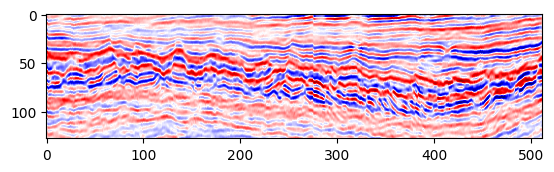

In [30]:
plt.imshow(np.concatenate([sample[0][0], sample[1][0], sample[2][0], sample[3][0]], axis=1), cmap=plt.cm.seismic)

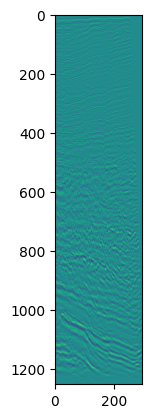

In [360]:
plt.imshow(val.transpose(2,0,1)[:,1,:])

In [399]:
from scripts.guided_diffusion.dataloader import SeismicDataset

In [400]:
ds = SeismicDataset('/poc-data/pvn/data', mode='train', datasets=['Kerry3D'], transform=None)

Number data: 15669


In [405]:
th.tensor(ds.data).min()

tensor(-0.9619, dtype=torch.float64)

In [425]:
np.load('/poc-data/pvn/data/F3/validation.npy').shape

(200, 701, 255)